In [3]:
import pandas as pd
import numpy as np

data_base = pd.read_csv('NSL-KDD/KDDTrain+.txt',header=None)


In [4]:
x = data_base.iloc[:,4:-1] 
z = x.copy()  
x.drop(x.columns[-1], axis=1, inplace=True) 
x = x.values.astype(int)
x

array([[ 491,    0,    0, ...,    0,    0,    0],
       [ 146,    0,    0, ...,    0,    0,    0],
       [   0,    0,    0, ...,    1,    0,    0],
       ...,
       [2231,  384,    0, ...,    0,    0,    0],
       [   0,    0,    0, ...,    1,    0,    0],
       [ 151,    0,    0, ...,    0,    0,    0]])

In [5]:
y = np.where(data_base[41] == "normal", 0, 1).astype(int)
y

array([0, 0, 1, ..., 0, 1, 0])

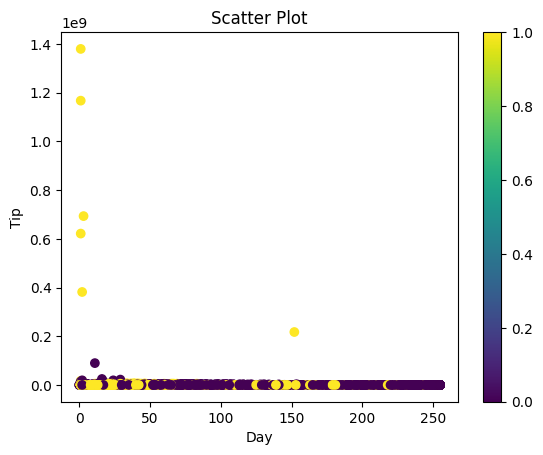

In [6]:
import matplotlib.pyplot as plt


plt.scatter(data_base[32], data_base[4], c=y)


plt.title("Scatter Plot")
 
# Setting the X and Y labels
plt.xlabel('Day')
plt.ylabel('Tip')
 
plt.colorbar()
 
plt.show()

## Acuracy of the algorithm Decision Tree Model

- Using 50% of the data to test and 50% to train the model

In [51]:
from sklearn import tree
from sklearn.model_selection import train_test_split
from sklearn import metrics


x_train, x_test,  y_train, y_test = train_test_split(x, y,train_size=0.5)

clf = tree.DecisionTreeClassifier()
classification = clf.fit(x_train, y_train)
y_pred = classification.predict(x_test)

acuracy = metrics.accuracy_score(y_test,y_pred)
performace = round(acuracy,2)
print(acuracy)


0.9963643291472843


# Confusion matrix

[[33602   106]
 [  123 29156]]


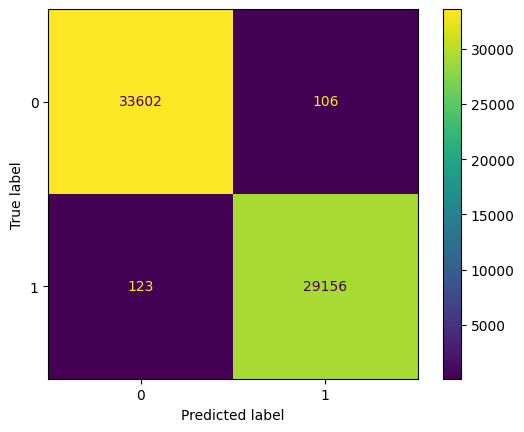

In [52]:

from sklearn.metrics import confusion_matrix

import matplotlib.pyplot as plt
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay


color = 'white'
cm = confusion_matrix(y_test, y_pred)

disp = ConfusionMatrixDisplay(confusion_matrix=cm, 
                              display_labels=classification.classes_)

print(cm)
disp.plot()
plt.show()

# Recall

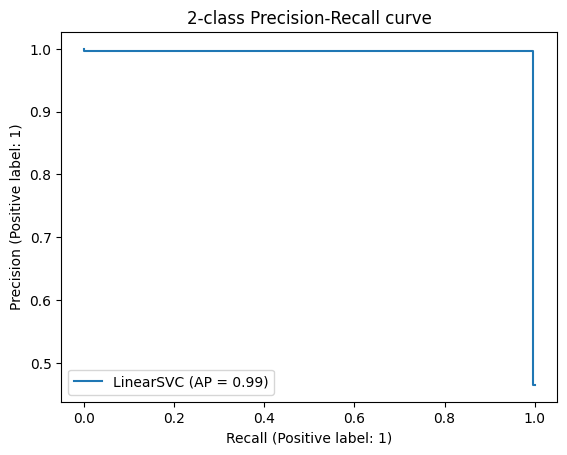

In [53]:

from sklearn.metrics import PrecisionRecallDisplay
from sklearn.metrics import recall_score

recall = (recall_score(y_test, y_pred, average=None))
display = PrecisionRecallDisplay.from_estimator(
    classification, x_test, y_test, name="LinearSVC"
)
_ = display.ax_.set_title("2-class Precision-Recall curve")


In [54]:
from sklearn.metrics import classification_report

target_names = ['class 0', 'class 1']
print(classification_report(y_test, y_pred, target_names=target_names))

from sklearn.metrics import classification_report
print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

     class 0       1.00      1.00      1.00     33708
     class 1       1.00      1.00      1.00     29279

    accuracy                           1.00     62987
   macro avg       1.00      1.00      1.00     62987
weighted avg       1.00      1.00      1.00     62987

              precision    recall  f1-score   support

           0       1.00      1.00      1.00     33708
           1       1.00      1.00      1.00     29279

    accuracy                           1.00     62987
   macro avg       1.00      1.00      1.00     62987
weighted avg       1.00      1.00      1.00     62987



y_train.shape

for i in range(len(DataBaseTest.index)):
    if DataBaseTest.iloc[i,-2] == 'normal':
        DataBaseTest.iloc[i,-2] = 0
    else:
        DataBaseTest.iloc[i,-2] = 1
DataBaseTest = DataBaseTest.iloc[:,:-1]
DataBaseTest = DataBaseTest.iloc[:,4:].values
DataBaseTest = DataBaseTest.astype(int)
